<div style="padding: 20px;
            color: white;
            margin: 10px;
            font-size: 200%;
            text-align: center;
            display: flex;
            align-items: center;
            justify-content: center;
            border-radius: 20px;
            background-color: #3b3745;
            overflow: hidden;
            font-weight: bold;
            text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
            Fish Market EDA & Modeling 🐟
</div>


<div style=" background-color:#3b3745;
            text-align:left;
            padding: 13px 13px; 
            border-radius: 8px; 
            margin: auto;
            color: white">
<h2> ➡ About Dataset</h2>
    
<b> Here's a description of each column in the dataset: </b>
<ul>
<li> 1️⃣<b>Species</b>: This column represents the species of the fish. It is a categorical variable that categorizes each fish into one of seven species. The species may include names like "Perch," "Bream," "Roach," "Pike," "Smelt," "Parkki," and "Whitefish." This column is the target variable for the polynomial regression analysis, where we aim to predict the fish's weight based on its other attributes.
    
<li> 2️⃣<b>Weight</b>: This column represents the weight of the fish. It is a numerical variable that is typically measured in grams. The weight is the dependent variable we want to predict using polynomial regression.
    
<li> 3️⃣<b>Length1</b>: This column represents the first measurement of the fish's length. It is a numerical variable, typically measured in centimetres.

<li> 4️⃣<b>Length2</b>: This column represents the second measurement of the fish's length. It is another numerical variable, typically measured in centimetres.
    
<li> 5️⃣<b>Length3</b>: This column represents the third measurement of the fish's length. Similar to the previous two columns, it is a numerical variable, usually measured in centimetres.
    
<li> 6️⃣<b>Height</b>: This column represents the height of the fish. It is a numerical variable, typically measured in centimetres.

<li> 7️⃣<b>Width</b>: This column represents the width of the fish. Like the other numerical variables, it is also typically measured in centimetres.
</ul>
    

<h4> The dataset is structured in such a way that each row corresponds to a single fish with its species and various physical measurements (lengths, height, and width). The goal of using polynomial regression on this dataset would be to build a predictive model that can estimate the weight of a fish based on its species and the provided physical measurements. Polynomial regression allows for modelling more complex relationships between the independent variables (lengths, height, and width) and the dependent variable (weight), which may be particularly useful if there are non-linear patterns in the data. </h4>
</div>

<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#3b3745;
            overflow:hidden;
            font-weight:700"><span style='color:#3b3745'></span> Table of Contents</div>

<a id="toc"></a>

- [1. Import Libraries .](#1)

- [2. Load the Dataset and Inspecting it .](#2)

- [3. EDA .](#3)
    - [3.1 Univariate Analysis .](#3.1)
    - [3.2 Bivariate Analysis & Multivariate Analysis .](#3.2)

- [4. Preprocessing for Machine Learning Model .](#4)
    - [4.1 Multicollinearity .](#4.1)
    - [4.2 Split Data .](#4.2)
    - [4.3 Data Transformation.](#4.3)

- [5. Modeling .](#5)
    
    - [5.1 Linear Regression model.](#5.1)
    
    - [5.2 Gradient Descent .](#5.2)
        - [5.2.1 Cross Validation .](#5.2.1)
        - [5.2.2 Plotting the actual vs predicted values .](#5.2.2)
    .
    - [5.3 Polynomial Regression ](#5.3)    
        - [5.3.1 Cross Validation .](#5.3.1)
        - [5.3.2 Plotting the actual vs predicted values .](#5.3.2)

<a id="1"></a>
## <b>1. <span style='color:#3b3745'>Import Libraries .</span></b>

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors

# Importing detect_outliers function from datasist library
from datasist.structdata import detect_outliers

# Importing modules from scikit-learn for machine learning tasks
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures

# Setting seaborn visualization parameters
sns.set(rc={"figure.figsize" : [15,8]}, font_scale=1.2)
sns.set(rc={"axes.facecolor":"#F2F3F4","figure.facecolor":"#F2F3F4"})
palette = ["#F08080", "#FA8072", "#E9967A", "#FFA07A", "#CD5C5C", "#AF601A", "#CA6F1E"]
sns.set_palette(palette)
color_map = colors.ListedColormap(palette)

<a id="2"></a>
## <b>2. <span style='color:#3b3745'>Load the Dataset and Inspecting it .</span></b>

In [2]:
fish = pd.read_csv("Fish.csv")

In [3]:
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
fish.shape ## (rows, cols...)

(159, 7)

In [5]:
fish.info() ## for some info such as datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [6]:
fish.isnull().any()

Species    False
Weight     False
Length1    False
Length2    False
Length3    False
Height     False
Width      False
dtype: bool

In [7]:
fish.duplicated().any()

False

<div class="alert alert-block alert-info" style="background-color:#3b3745;
                                                 color:white;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:70%;
                                                 margin: auto;
                                                 text-align: left;">
<b>The data consists of 159 rows and 7 columns, with no missing or duplicated values in the dataset. There is only one column 'category,' while the rest are numerical.</b>
</div>

<a id="3"></a>
## <b>3. <span style='color:#3b3745'>EDA .</span></b>

<a id="3.1"></a>
#### <b>3.1 <span style='color:#3b3745'>Univariate Analysis .</span></b>

#### Numerical Columns
- Width
- Weight
- Length1 (Vertical length in CM)
- Length2 (Diagonal length in CM)
- Length3 (Cross length in CM)
- Height

In [8]:
## to get statistics for numerical columns.
## The include="number" parameter specifies that only numerical columns should be included in the summary statistics.
fish.describe(include="number").T

,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
Length1,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
Length2,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
Length3,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


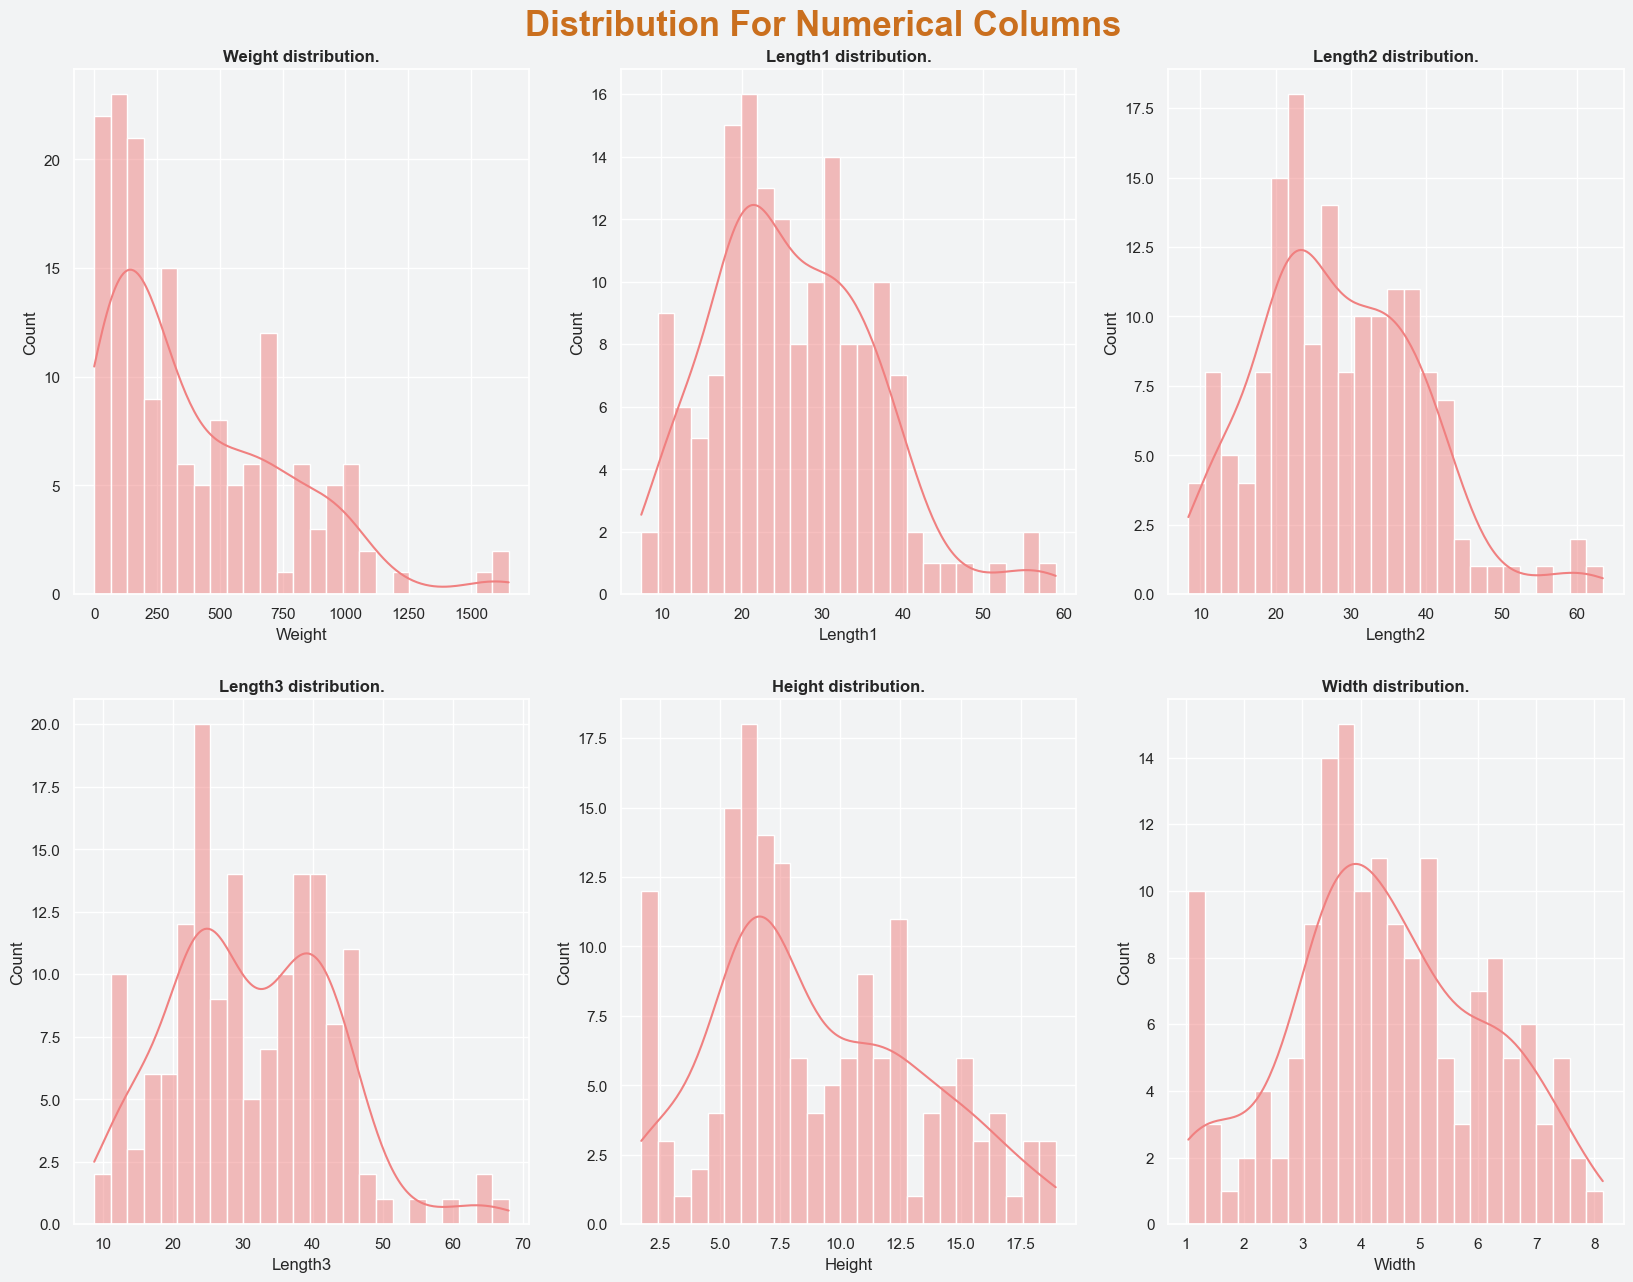

In [9]:
## Extracting numerical columns from the 'fish' DataFrame
numerical_columns = fish.select_dtypes(include="number").columns.to_list()
## fig. size
plt.figure(figsize=(20, 15))

## Looping through each numerical column for plotting
for idx, column in enumerate(numerical_columns):
    
    ## Creating subplots within the grid
    plt.subplot(2, 3, idx+1)
    
    ## Plotting histogram with KDE for the current numerical column
    sns.histplot(data=fish,
                 x=column,
                 bins=25,
                 kde=True)
    
    ## title for the subplot
    plt.title(f"{column} distribution.", weight="bold")

## overall title
plt.suptitle("Distribution for Numerical Columns".title(), weight="bold", fontsize=25, x=0.5, y=0.92, color="#CA6F1E")

## Displaying the plot
plt.show()

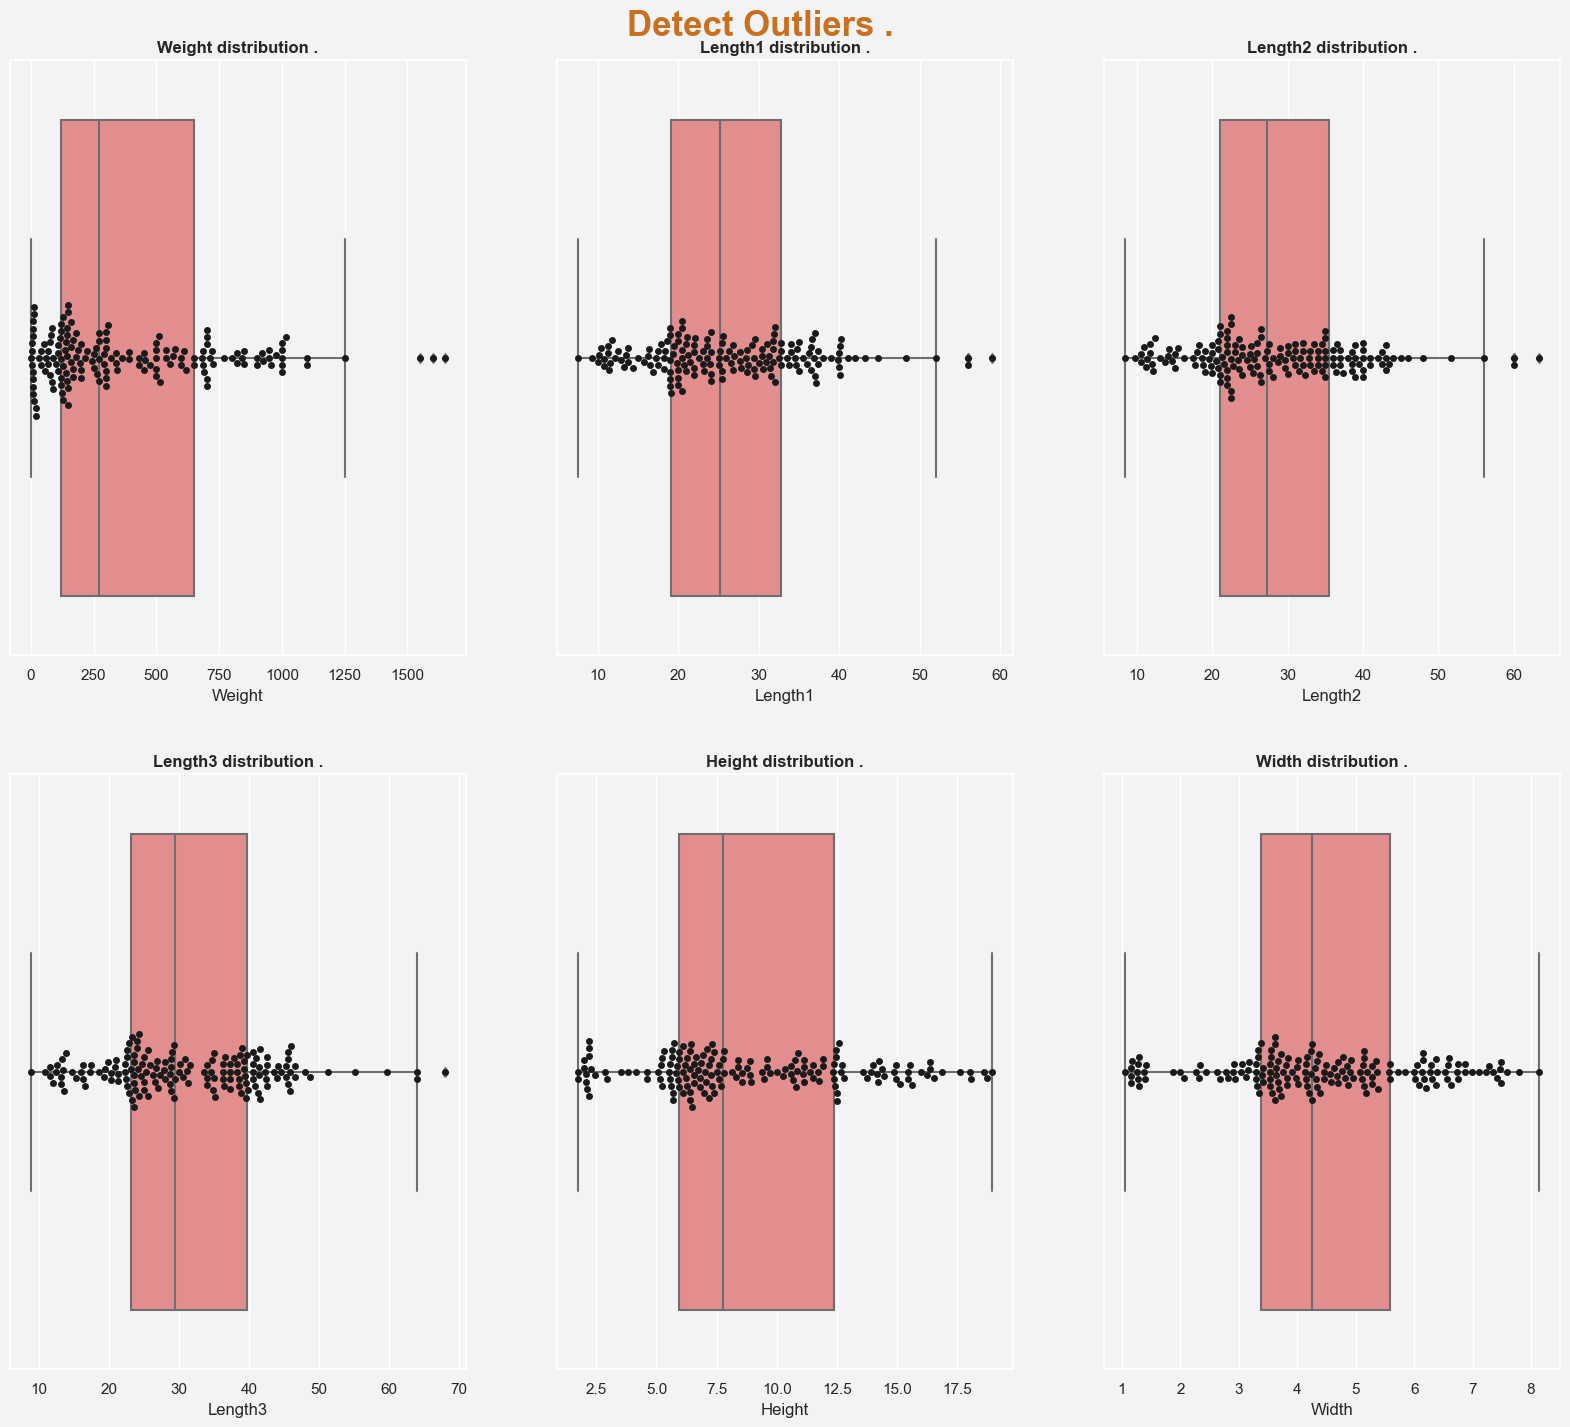

In [10]:
plt.figure(figsize=(20, 17))

for idx, column in enumerate(numerical_columns):
    plt.subplot(2, 3, idx+1)
    sns.boxplot(data=fish, x=column)
    sns.swarmplot(data=fish, x=column, color="k")
    plt.title(f"{column} distribution .", weight="bold")
plt.suptitle("Detect Outliers .".title(), weight="bold", fontsize=25, x=0.5, y=0.91, color="#CA6F1E")
plt.show()

<div class="alert alert-block alert-info" style="background-color:#3b3745;
                                                 color:white;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:70%;
                                                 margin: auto;
                                                 text-align: left;">
<b>The distribution of numerical features is somewhat good, except for the width and length, both of which contain outliers.</b>
</div>

#### `Detect Outliers Using datasist library`

In [11]:
idx = detect_outliers(
    data=fish,
    n=0, ## the bench mark for the number of allowable outliers in the columns.
    features=['Weight', 'Length1', 'Length2', 'Length3']
)


In [12]:
fish.iloc[idx]

,Species,Weight,Length1,Length2,Length3,Height,Width
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


<div class="alert alert-block alert-info" style="background-color:#3b3745;
                                                 color:white;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:70%;
                                                 margin: auto;
                                                 text-align: left;">
<b>The outliers present in the data belong to the pike fish type. After search, I found that this fish type is known to reach high weights, indicating that these values are valid.</b>
</div>

#### Categorical Column.

In [13]:
fish.describe(exclude="number")

,Species
count,159
unique,7
top,Perch
freq,56


In [14]:
fish["Species"].value_counts(normalize=True).to_frame()

,Species
Perch,0.352201
Bream,0.220126
Roach,0.125786
Pike,0.106918
Smelt,0.088050
Parkki,0.069182
Whitefish,0.037736


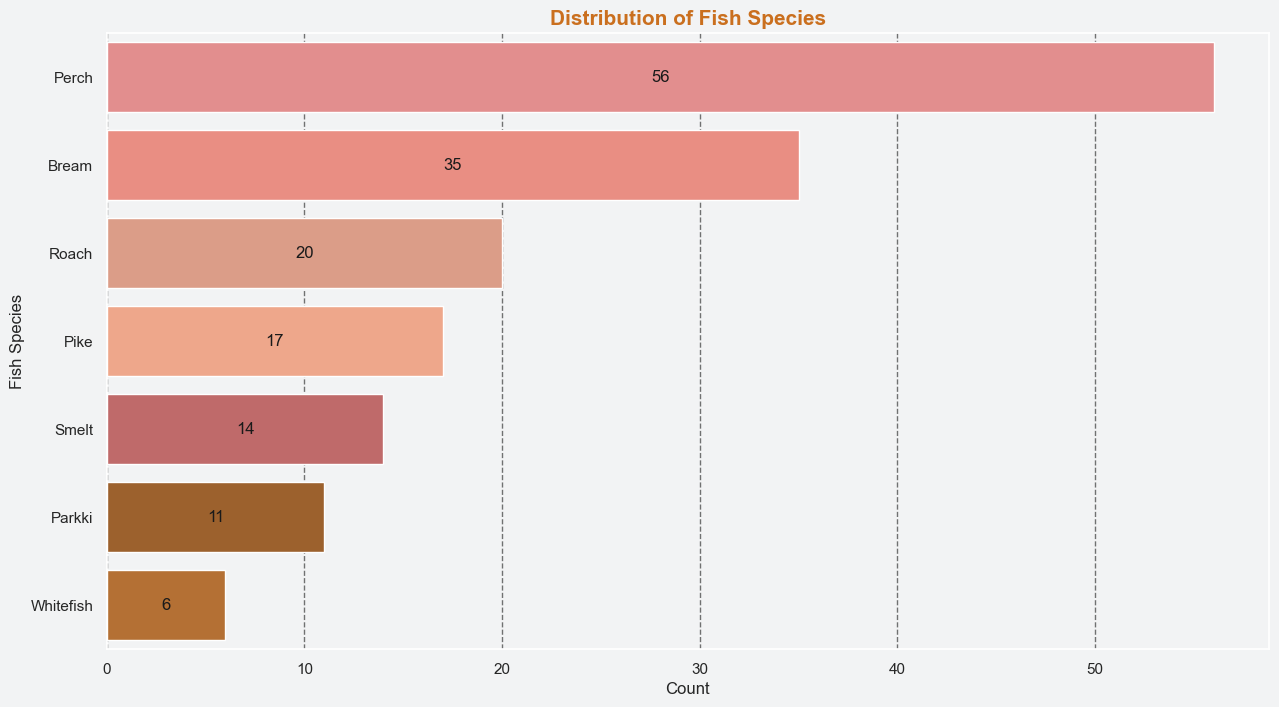

In [15]:
## Create a count plot for the "Species" column
ax = sns.countplot(data=fish, y="Species", order=fish["Species"].value_counts().index)

## Add counts on top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type="center", color="k")

## Add title and labels
plt.title("Distribution of Fish Species", fontsize=15, weight="bold", color="#CA6F1E")
plt.xlabel("Count")
plt.ylabel("Fish Species")
plt.grid(axis="x", linestyle="--", alpha=0.6, c="k")

## Show plot
plt.show()

<div class="alert alert-block alert-info" style="background-color:#3b3745;
                                                 color:white;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:50%;
                                                 margin: auto;
                                                 text-align: left;">
<b>The most frequently occurring fish species in the data is 'Perch'.</b>
</div>

<a id="3.2"></a>
#### <b>3.2 <span style='color:#3b3745'>Bivariate Analysis & Multivariate Analysis .</span></b>

#### `1. Is there a correlation between the weight of the fish and its length in the Fish Market?`

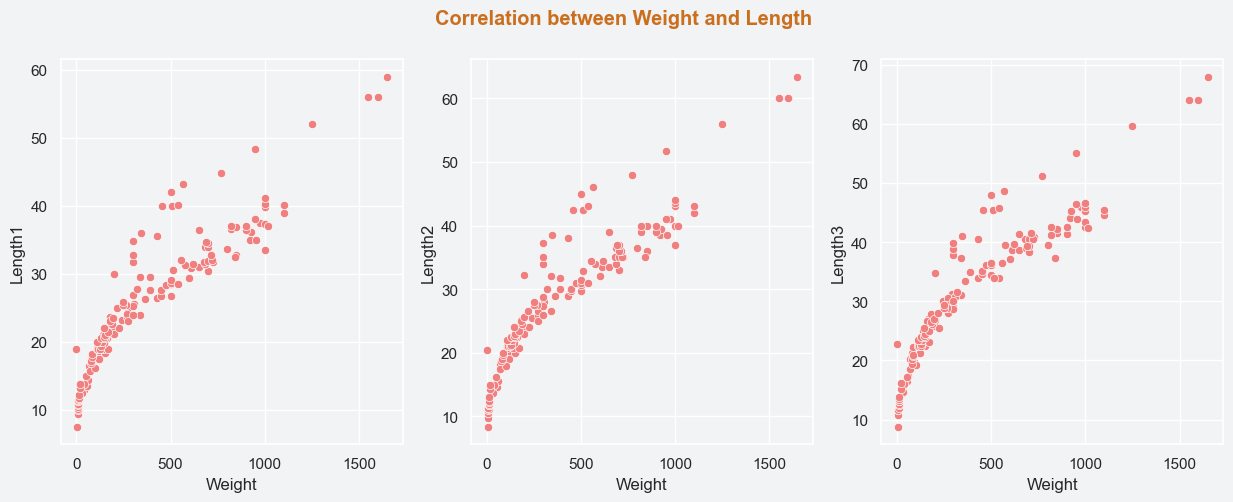

In [16]:
condition = fish.columns.str.contains("Length")
all_length = fish.columns[condition].tolist()
plt.figure(figsize=(15,5))

for idx, column in enumerate(all_length):
    
    plt.subplot(1, 3, idx+1)
    sns.scatterplot(data=fish, x="Weight", y=column)
plt.suptitle("Correlation between Weight and Length", weight="bold", color="#CA6F1E")
plt.show()

In [17]:
fish[["Length1", "Length2", "Length3", "Weight"]].corr()

,Length1,Length2,Length3,Weight
Length1,1.000000,0.999517,0.992031,0.915712
Length2,0.999517,1.000000,0.994103,0.918618
Length3,0.992031,0.994103,1.000000,0.923044
Weight,0.915712,0.918618,0.923044,1.000000


<div class="alert alert-block alert-info" style="background-color:#3b3745;
                                                 color:white;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:50%;
                                                 margin: auto;
                                                 text-align: left;">
<b>The is a strong positive correlation between height and weight.
</b>
</div>

#### `2. How does the weight of the fish differ based on its species?`

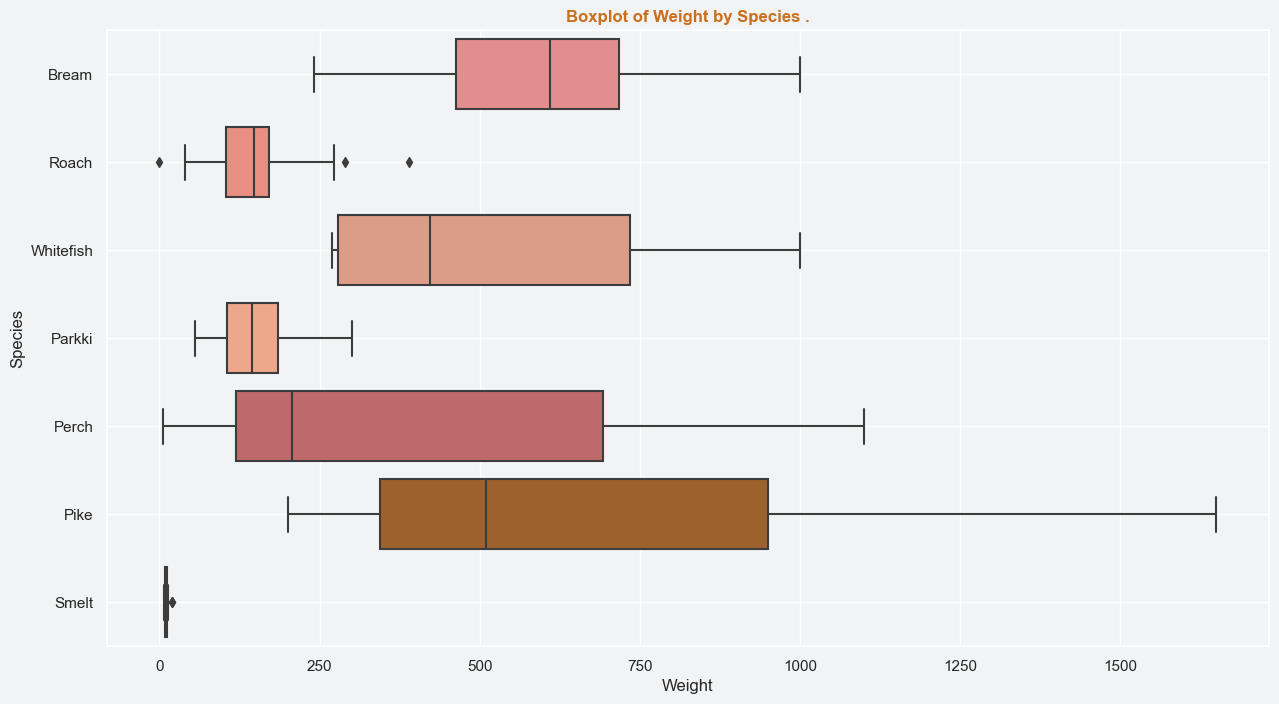

In [18]:
sns.boxplot(data=fish, x="Weight", y="Species")
plt.title('Boxplot of Weight by Species .', weight="bold", color="#CA6F1E")
plt.xlabel('Weight')
plt.ylabel('Species')
plt.grid(True)
plt.show()

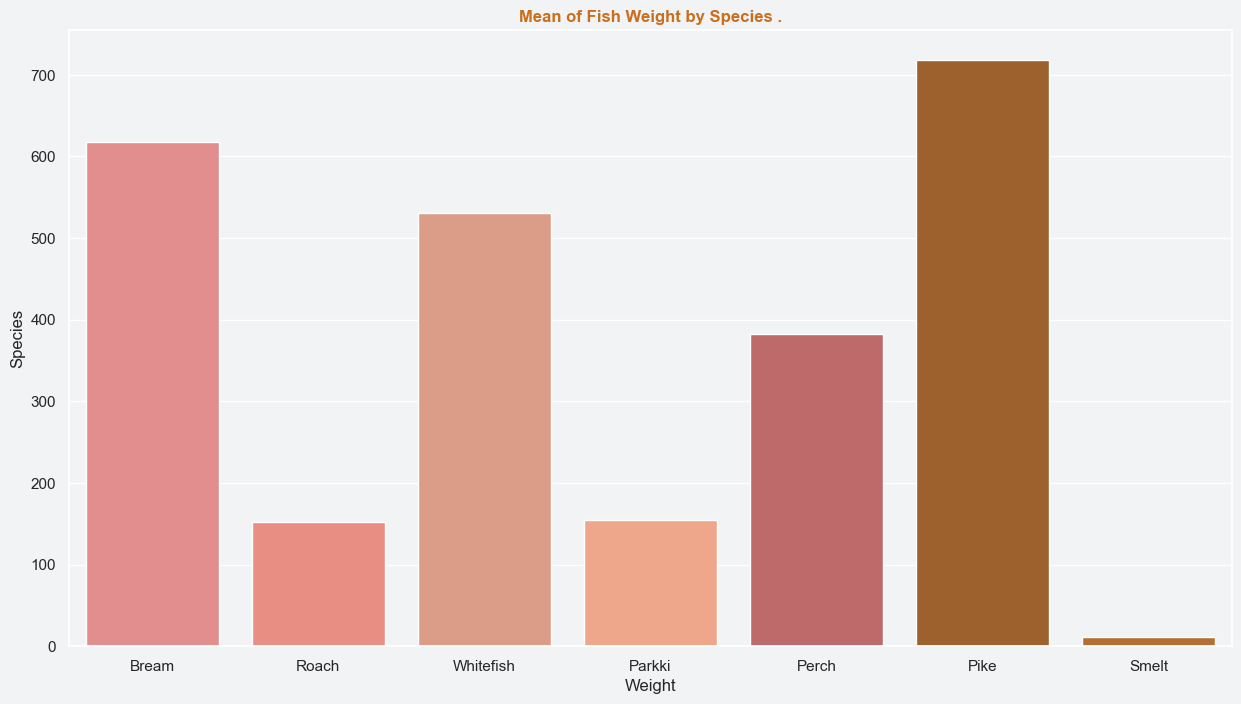

In [19]:
## Create barplot using seaborn between species and the mean of weight
sns.barplot(
    data=fish,
    x="Species",
    y="Weight",
    errorbar=('ci', False),
    estimator='mean'
)

## title and labels name
plt.title('Mean of Fish Weight by Species .', weight="bold", color="#CA6F1E")
plt.xlabel('Weight')
plt.ylabel('Species')

## Show plot
plt.show()
plt.show()

<div class="alert alert-block alert-info" style="background-color:#3b3745;
                                                 color:white;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:60%;
                                                 margin: auto;
                                                 text-align: left;">
<b>The fish species called Pike has the highest average weight, followed by bream.
</b>
</div>
<div class="alert alert-block alert-info" style="background-color:#3b3745;
                                                 color:white;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:60%;
                                                 margin: auto;
                                                 text-align: left;">
<b>The fish species named smelt has the smallest average weight among the types.
</b>
</div>

#### `3. Is there a relationship between the Length and Weight of the fish across different species?`


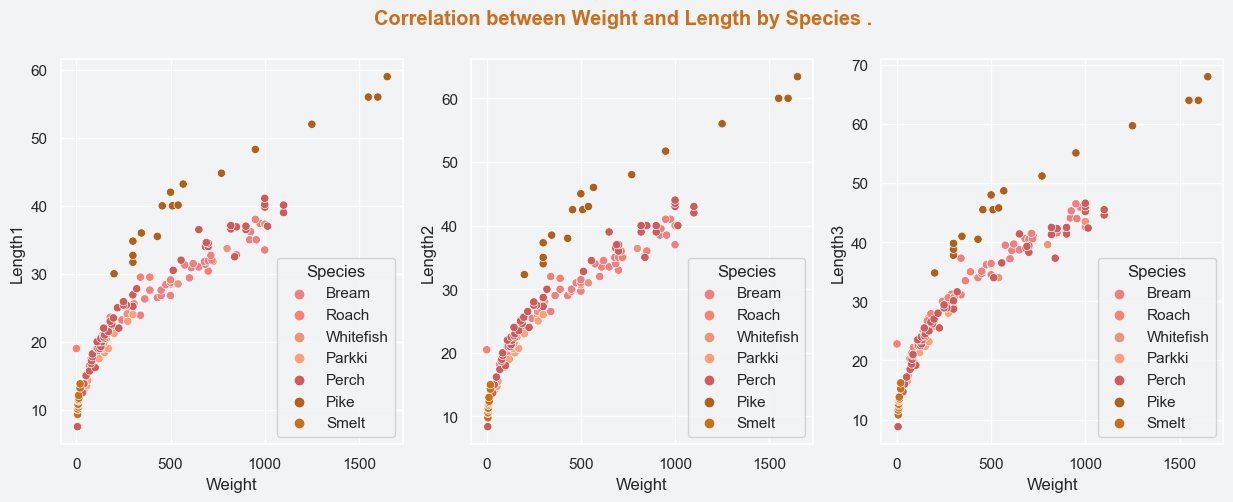

In [20]:
plt.figure(figsize=(15,5))

for idx, column in enumerate(all_length):
    
    plt.subplot(1, 3, idx+1)
    sns.scatterplot(data=fish, x="Weight", y=column, hue="Species")
plt.suptitle("Correlation between Weight and Length by Species .", weight="bold", color="#CA6F1E")
plt.show()


<div class="alert alert-block alert-info" style="background-color:#3b3745;
                                                 color:white;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:70%;
                                                 margin: auto;
                                                 text-align: left;">
<b>It is evident that the weight and length of each species are directly proportional, indicating a strong positive correlation between them.</b>
</div>

#### `4. What is the correlation between the height and width of the fish in the dataset?`

In [21]:
fish[["Height", "Width"]].corr()

,Height,Width
Height,1.000000,0.792881
Width,0.792881,1.000000


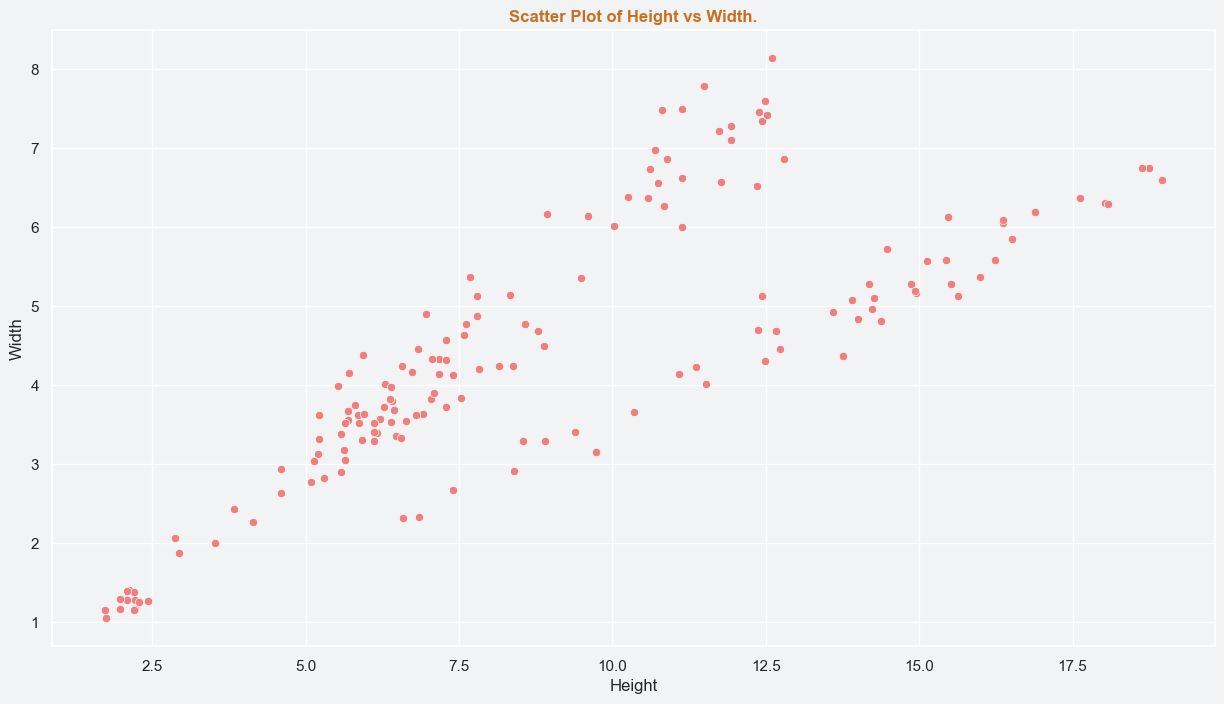

In [22]:
sns.scatterplot(data=fish, x="Height", y="Width")
plt.title('Scatter Plot of Height vs Width.', weight="bold", color="#CA6F1E")
plt.xlabel('Height')
plt.ylabel('Width')
plt.grid(True)
plt.show()

<div class="alert alert-block alert-info" style="background-color:#3b3745;
                                                 color:white;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:50%;
                                                 margin: auto;
                                                 text-align: left;">
<b>The length and width of the fish show a strong positive correlation.
</b>
</div>

#### `5. Is there a relationship between the height and width of the fish across different species?`

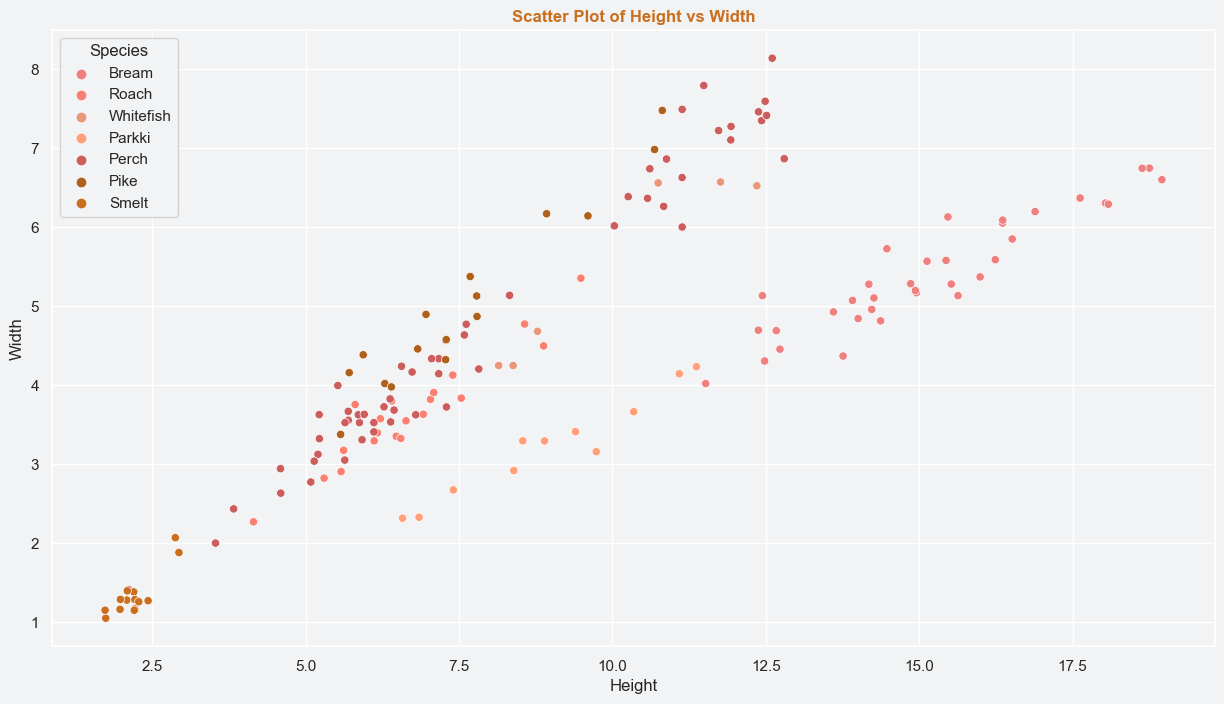

In [23]:
sns.scatterplot(data=fish, x="Height", y="Width", hue="Species")
plt.title('Scatter Plot of Height vs Width', weight="bold", color="#CA6F1E")
plt.xlabel('Height')
plt.ylabel('Width')
plt.grid(True)
plt.show()

In [24]:
## Selecting rows where the species is "Pike" and extracting columns "Height" and "Width"
pike_data = fish[fish["Species"] == "Pike"][["Height", "Width"]]

## Calculating the correlation coefficient between the height and width of Pike
corr_coeff = pike_data.corr().iloc[0, 1].round(2)
print(f"correlation between height and width for pike type : {corr_coeff}")

correlation between height and width for pike type : 0.97


In [25]:
## Selecting rows where the species is "Pike" and extracting columns "Height" and "Width"
pike_data = fish[fish["Species"] == "Smelt"][["Height", "Width"]]

## Calculating the correlation coefficient between the height and width of Pike
corr_coeff = pike_data.corr().iloc[0, 1].round(2)
print(f"correlation between height and width for smelt type : {corr_coeff}")

correlation between height and width for smelt type : 0.87


<div class="alert alert-block alert-info" style="background-color:#3b3745;
                                                 color:white;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:70%;
                                                 margin: auto;
                                                 text-align: left;">
<b>Yes, there is a relationship between height and width in different fish species. For example, in the case of Pike fish, the correlation coefficient between height and width is 0.97 (strong positive correlation).
</b>
</div>

#### `6. Is there any relationship between the length of the fish and the height ?`

In [26]:
fish[["Length1", "Length2", "Length3", "Height"]].corr()[["Height"]]

,Height
Length1,0.625378
Length2,0.640441
Length3,0.703409
Height,1.000000


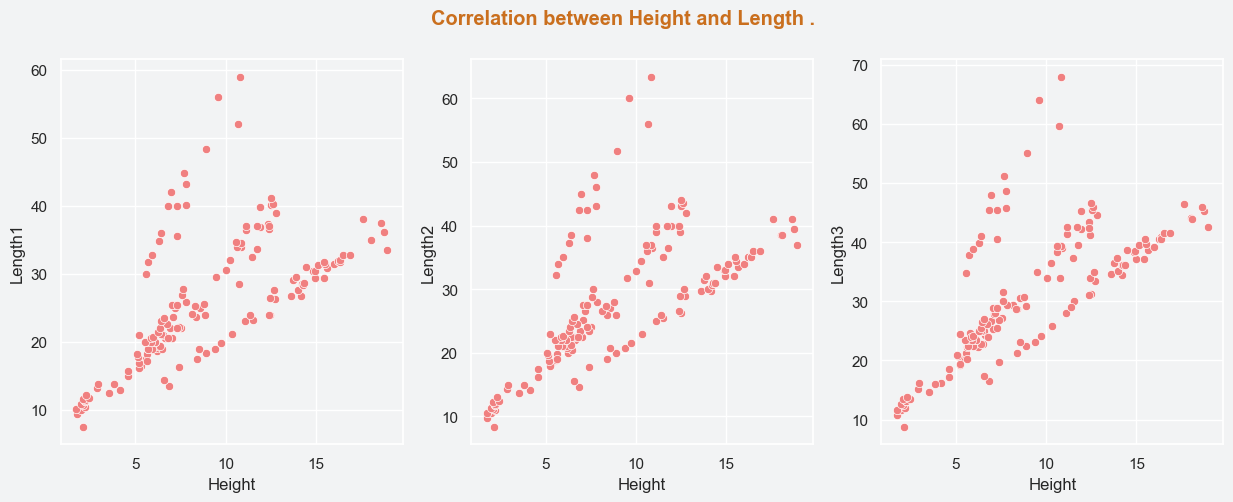

In [27]:
plt.figure(figsize=(15,5))

for idx, column in enumerate(all_length):
    
    plt.subplot(1, 3, idx+1)
    sns.scatterplot(data=fish, x="Height", y=column)
plt.suptitle("Correlation between Height and Length .", weight="bold", color="#CA6F1E")
plt.show()


<div class="alert alert-block alert-info" style="background-color:#3b3745;
                                                 color:white;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:50%;
                                                 margin: auto;
                                                 text-align: left;">
<b>There is a strong positive correlation between length and height.
</b>
</div>

#### `7. Distribution of Height by Species.`

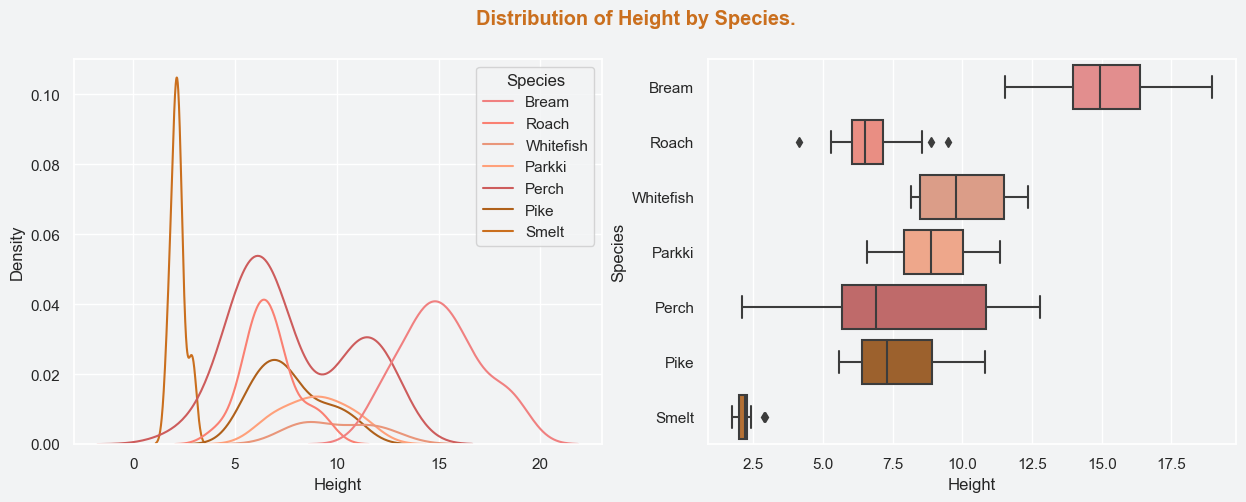

In [28]:
## figure size
plt.figure(figsize=(15,5))

## Subplot 1: KDE plot for the distribution of fish height by species
plt.subplot(1, 2, 1)
sns.kdeplot(
    data=fish,
    x="Height",
    hue="Species"
)

## Subplot 2: Box plot for the distribution of fish height by species
plt.subplot(1, 2, 2)
sns.boxplot(
    data=fish,
    x="Height",
    y="Species"
)

## Set the overall title for figure
plt.suptitle("Distribution of Height by Species.", weight="bold", color="#CA6F1E")
## Show Plot
plt.show()

#### `8. Calculate the average height for each species.`

In [29]:
average_height_by_species = fish.groupby('Species')['Height'].mean()
print("Average Height for Each Species:")
print(average_height_by_species.sort_values(ascending=False))

Average Height for Each Species:
Species
Bream        15.183211
Whitefish    10.027167
Parkki        8.962427
Perch         7.861870
Pike          7.713771
Roach         6.694795
Smelt         2.209371
Name: Height, dtype: float64



<div class="alert alert-block alert-info" style="background-color:#3b3745;
                                                 color:white;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:55%;
                                                 margin: auto;
                                                 text-align: left;">
<b>It is evident that the height of fish varies depending on the fish species.
</b>
</div>

#### `9. Pairplot using seaborn by Species`

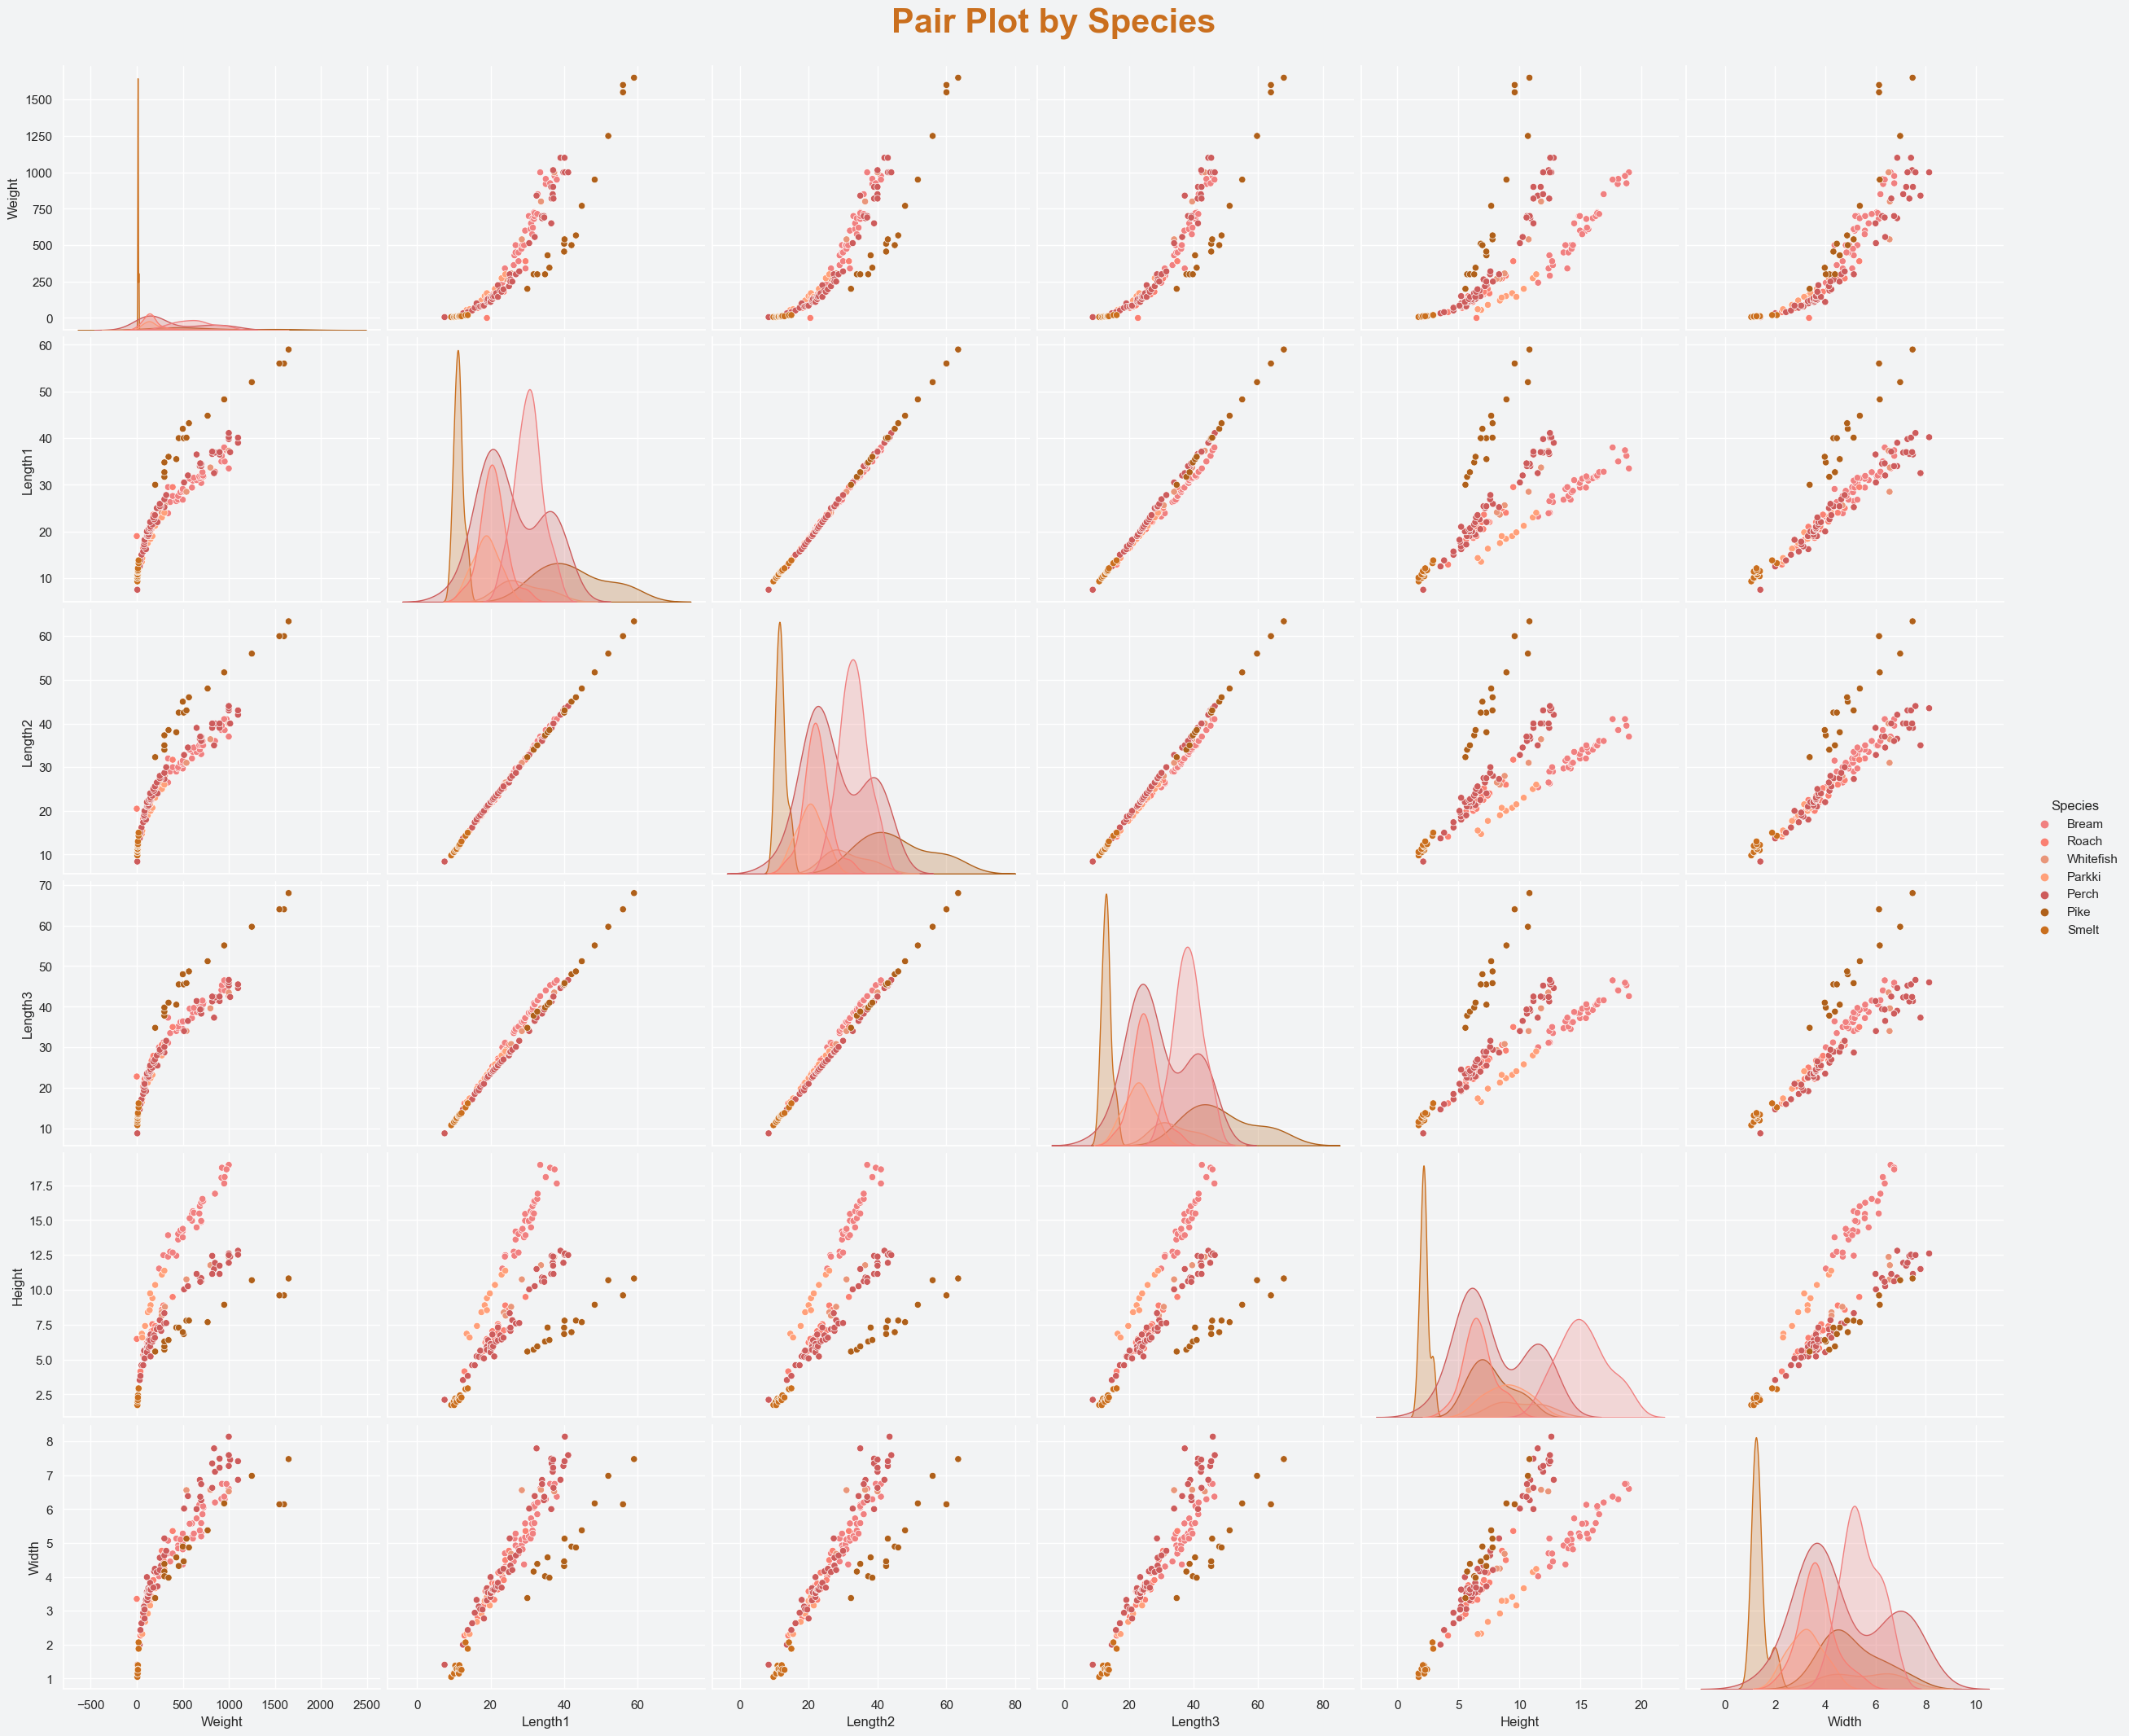

In [30]:
pair_plot = sns.pairplot(
    data=fish,
    hue="Species",
    diag_kind="kde",  # Use kernel density estimates on diagonal plots
    height=3.5,  # Set the height of each subplot
    aspect=1.2  # Adjust the aspect ratio of the subplots
)
pair_plot.fig.suptitle("Pair Plot by Species", y=1.02, fontsize=30, weight="bold", color="#CA6F1E")
plt.show()

<a id="4"></a>
## <b>4. <span style='color:#3b3745'>Preprocessing for Machine Learning Model .</span></b>

<a id="4.1"></a>
### <b>4.1 <span style='color:#3b3745'>Multicollinearity .</span></b>

<div class="alert alert-block alert-info" style="background-color:#3b3745;
                                                 color:white;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:70%;
                                                 margin: auto;
                                                 text-align: left;">
<b>When you're creating a linear model that uses many features to make predictions, some of those features can be highly correlated with each other. This isn't a problem that's going to break your model; it will still make predictions and it might have good performance metrics. But it is an issue if you want to interpret the coefficients for your model because it becomes hard to tell which features are truly important. (Source: WorldQuant University)
</b>
</div>

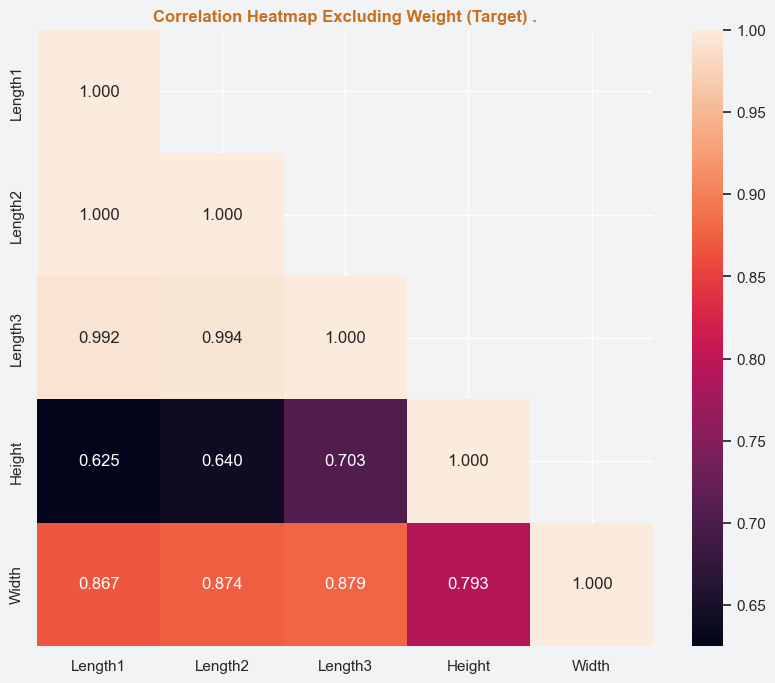

In [31]:
## Calculate the correlation matrix, excluding the 'Weight' column (target)
multi_corr = fish.drop("Weight", axis=1).corr(numeric_only=True)

## Create a mask for the upper triangle to hide it
mask = np.triu(np.ones_like(multi_corr), k=1)

## figure size
plt.figure(figsize=(10, 8))

## heatmap using seaborn
sns.heatmap(
    multi_corr,
    annot=True,       # Display the correlation values
    mask=mask,        # Apply the mask to hide the upper triangle
    square=True,       # Ensure square-shaped cells
    fmt="0.3f"
)

## title of the heatmap
plt.title("Correlation Heatmap Excluding Weight (Target) .", weight="bold", color="#CA6F1E")

## Show the plot
plt.show()

In [32]:
## Drop Columns with multucollinearlity 
fish.drop(columns=["Length2", "Length3"], inplace=True)

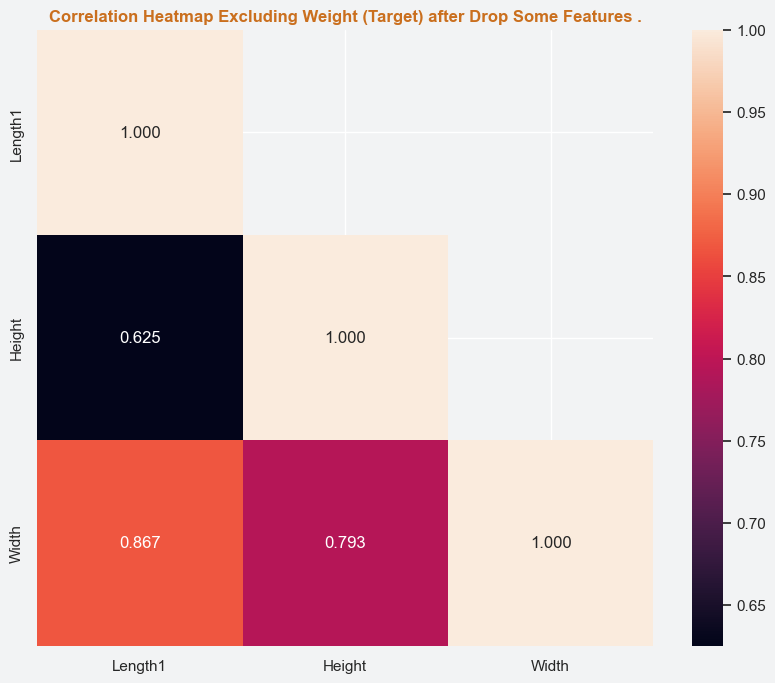

In [33]:
## Calculate the correlation matrix, excluding the 'Weight' column (target)
multi_corr = fish.drop("Weight", axis=1).corr(numeric_only=True)

## Create a mask for the upper triangle to hide it
mask = np.triu(np.ones_like(multi_corr), k=1)

## figure size
plt.figure(figsize=(10, 8))

## heatmap using seaborn
sns.heatmap(
    multi_corr,
    annot=True,       # Display the correlation values
    mask=mask,        # Apply the mask to hide the upper triangle
    square=True,       # Ensure square-shaped cells
    fmt="0.3f"
)

## title of the heatmap
plt.title("Correlation Heatmap Excluding Weight (Target) after Drop Some Features .", weight="bold", color="#CA6F1E")

## Show the plot
plt.show()

<a id="4.2"></a>
### <b>4.2 <span style='color:#3b3745'>Split Data .</span></b>

In [34]:
target = "Weight"
X = fish.drop(target, axis=1)
y = fish[target]
print(f"Shape of Independent Features : {X.shape}")
print(f"Shape of Dependent Feature : {y.shape}")

Shape of Independent Features : (159, 4)
Shape of Dependent Feature : (159,)


In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, shuffle=True
)
print(f"X Train Shape : {X_train.shape}")
print(f"y Train Shape : {y_train.shape}")
print(f"X Test Shape : {X_test.shape}")
print(f"y Test Shape : {y_test.shape}")

X Train Shape : (119, 4)
y Train Shape : (119,)
X Test Shape : (40, 4)
y Test Shape : (40,)


<a id="4.3"></a>
### <b>4.3 <span style='color:#3b3745'>Data Transformation.</span></b>


<div style=" background-color:#3b3745;
            text-align:left;
            padding: 13px 13px; 
            border-radius: 8px; 
            margin: auto;
            color: white">
<ul>
    <li>#️⃣ ColumnTransformer is used to apply different preprocessing steps to different subsets of columns.
    <li>#️⃣ "Numerical Cols": StandardScaler() is used to standardize (mean=0, std=1) numerical features.
    <li>#️⃣ "Categorical Cols": OneHotEncoder() is used to perform one-hot encoding on categorical features.
    <li>#️⃣ The ColumnTransformer is fitted on the training data to learn the transformations.
</ul>
    <h3> ⚠ The fitted ColumnTransformer is then used to transform both the training and test data. Why ? </h3>
    <b> Avoid Data Leakage: Fitting transformers on the test data separately could lead to data leakage. Data leakage occurs when information from the test set unintentionally influences the model during training. To prevent this, transformations should be learned only from the training data and then applied consistently to both training and test datasets. <b>
</div>

In [36]:
num_feat = X.select_dtypes(include="number").columns.to_list()
categ_feat = X.select_dtypes(exclude="number").columns.to_list()
print("After addressing multicollinearity, the remaining columns are:")
print(f"Numerical Feature in the Data ==> {num_feat}")
print(f"Categorical Feature in the Data ==> {categ_feat}")

After addressing multicollinearity, the remaining columns are:
Numerical Feature in the Data ==> ['Length1', 'Height', 'Width']
Categorical Feature in the Data ==> ['Species']


In [37]:
## Create a ColumnTransformer for preprocessing numerical and categorical features

preprocess_cols = ColumnTransformer([
    ("Numerical Cols", StandardScaler(), num_feat),
    ("Categorical Cols", OneHotEncoder(), categ_feat)
])

## Fit the ColumnTransformer on the training data..
preprocess_cols.fit(X_train)

## Transform the training and test data using the fitted ColumnTransformer
X_train_final = preprocess_cols.transform(X_train)
X_test_final = preprocess_cols.transform(X_test)

<a id="5"></a>
## <b>5 <span style='color:#3b3745'>Modeling .</span></b>

<a id="5.1"></a>
### <b>5.1 <span style='color:#3b3745'>Linear Regression model.</span></b>

In [38]:
## Create an instance of the LinearRegression model
lin_reg = LinearRegression()

## Fit the model to the training data
## X_train_final: Features of the training set
## y_train: Target values of the training set
lin_reg.fit(X_train_final, y_train)

LinearRegression()

In [39]:
## Predictions on the training set using the trained Linear Regression model
lin_reg_train_predict = lin_reg.predict(X_train_final)
## Predictions on the testing set using the trained Linear Regression model
lin_reg_test_predict = lin_reg.predict(X_test_final)

## Mean Squared Error (MSE) for the training data
print(f"MSE For Training Data (Linear Reg.) : {mean_squared_error(y_train, lin_reg_train_predict).round(2)}")
## Mean Squared Error (MSE) for the testing data
print(f"MSE For Testing Data (Linear Reg.) : {mean_squared_error(y_test, lin_reg_test_predict).round(2)}")
print("**" * 50)
## Mean Absolute Error (MAE) for the training data
print(f"MAE For Training Data (Linear Reg.) : {mean_absolute_error(y_train, lin_reg_train_predict).round(2)}")
## Mean Absolute Error (MAE) for the testing data
print(f"MAE For Testing Data (Linear Reg.) : {mean_absolute_error(y_test, lin_reg_test_predict).round(2)}")
print("**" * 50)
## R-squared score for the training data
print(f"R-Squere Score For Training Data (Linear Reg.) : {r2_score(y_train, lin_reg_train_predict).round(2) * 100} %")
## R-squared score for the testing data
print(f"R-Squere Score For Testing Data (Linear Reg.) : {r2_score(y_test, lin_reg_test_predict).round(2) * 100} %")

MSE For Training Data (Linear Reg.) : 9469.35
MSE For Testing Data (Linear Reg.) : 7950.67
****************************************************************************************************
MAE For Training Data (Linear Reg.) : 70.83
MAE For Testing Data (Linear Reg.) : 64.86
****************************************************************************************************
R-Squere Score For Training Data (Linear Reg.) : 92.0 %
R-Squere Score For Testing Data (Linear Reg.) : 94.0 %


<a id="5.2"></a>
### <b>5.2 <span style='color:#3b3745'>Gradient Descent .</span></b>

In [40]:
## Create an instance of the SGDRegressor model with specific parameters
## penalty=None: No regularization penalty
## random_state=90: Seed for reproducibility
## learning_rate='constant': Constant learning rate
## eta0=0.01: Initial learning rate
SGD = SGDRegressor(
    penalty=None, random_state=90, learning_rate='constant', eta0=0.02, max_iter=1000
)

## Fit the model to the training data
## X_train_final: Features of the training set
## y_train: Target values of the training set
SGD.fit(X_train_final, y_train)

SGDRegressor(eta0=0.02, learning_rate='constant', penalty=None, random_state=90)

In [41]:
SGD_train_predict = SGD.predict(X_train_final)
SGD_test_predict = SGD.predict(X_test_final)

print(f"MSE For Training Data (SGD) : {mean_squared_error(y_train, SGD_train_predict).round(2)}")
print(f"MSE For Testing Data (SGD) : {mean_squared_error(y_test, SGD_test_predict).round(2)}")
print("**" * 50)
print(f"MAE For Training Data (SGD) : {mean_absolute_error(y_train, SGD_train_predict).round(2)}")
print(f"MAE For Testing Data (SGD) : {mean_absolute_error(y_test, SGD_test_predict).round(2)}")
print("**" * 50)
print(f"R-Square Score For Training Data (SGD) : {r2_score(y_train, SGD_train_predict).round(2) * 100} %")
print(f"R-Square Score For Testing Data (SGD) : {r2_score(y_test, SGD_test_predict).round(2) * 100} %")

MSE For Training Data (SGD) : 10559.76
MSE For Testing Data (SGD) : 7638.16
****************************************************************************************************
MAE For Training Data (SGD) : 74.15
MAE For Testing Data (SGD) : 65.4
****************************************************************************************************
R-Square Score For Training Data (SGD) : 92.0 %
R-Square Score For Testing Data (SGD) : 94.0 %


<a id="5.2.1"></a>
#### <b>5.2.1 <span style='color:#3b3745'>Cross Validation .</span></b>

In [42]:
results = cross_val_score(
    estimator=SGD, X=X_train_final, y=y_train, scoring="r2", cv=5
)
print(f'CV Score using R-Square: {results}')
print(f'Mean of Results: {results.mean().round(2) * 100} %')
print(f'SD of results: {results.std().round(4)}') ## Standard Deviation

CV Score using R-Square: [0.92730828 0.90837316 0.92345215 0.85818149 0.88142269]
Mean of Results: 90.0 %
SD of results: 0.0263


<a id="5.2.2"></a>
#### <b>5.2.2 <span style='color:#3b3745'>Plotting the actual vs predicted values .</span></b>

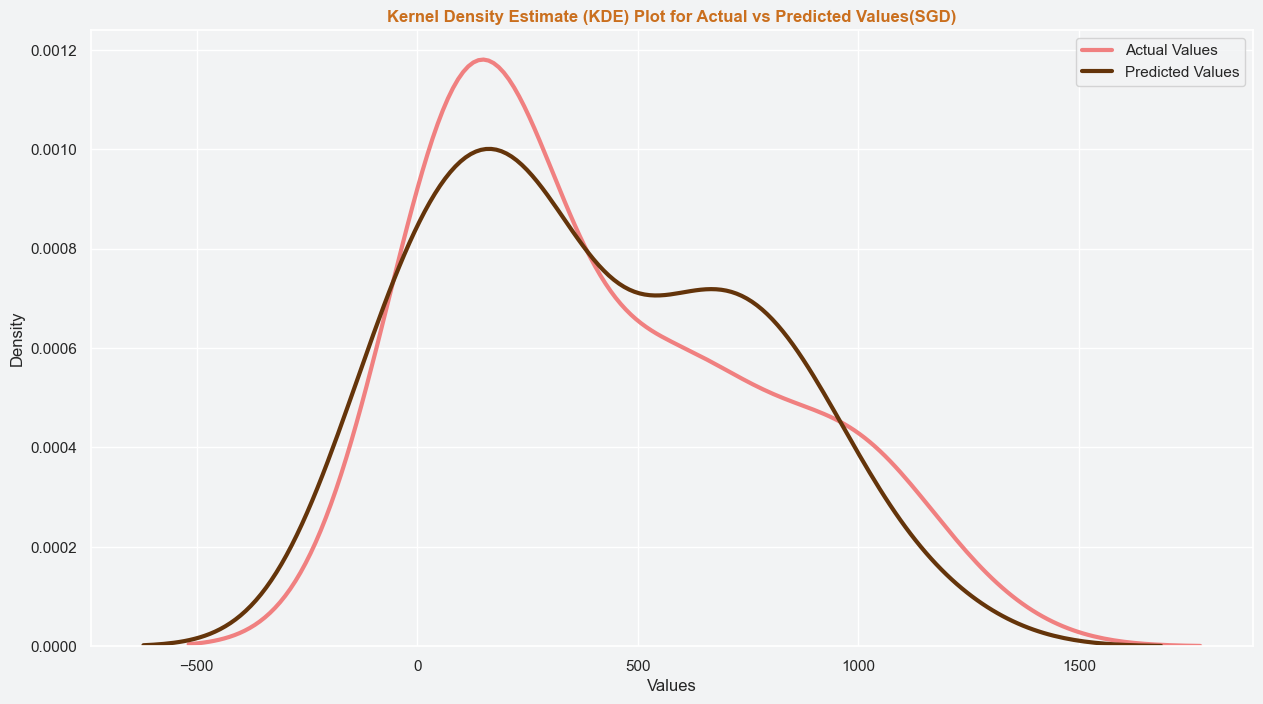

In [43]:
## Create kernel density estimate (KDE) plots
sns.kdeplot(x=y_test,linewidth=3, label='Actual Values')
sns.kdeplot(x=SGD_test_predict,linewidth=3, color="#64340A", label='Predicted Values')
plt.xlabel("Values")
plt.ylabel("Density")
plt.title("Kernel Density Estimate (KDE) Plot for Actual vs Predicted Values(SGD)", weight="bold", color="#CA6F1E")
plt.legend()  # Display legend
## Show plot
plt.show()

<a id="5.3"></a>
### <b>5.3 <span style='color:#3b3745'>Polynomial Regression .</span></b>


<div class="alert alert-block alert-info" style="background-color:#3b3745;
                                                 color:white;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:70%;
                                                 margin: auto;
                                                 text-align: left;">
<b>In Polynomial Regression, the relationship between x and y is represented by a polynomial equation, which can capture more complex relationships, including curvature and other non-linear patterns. The degree of the polynomial equation determines the level of complexity in the relationship. The simplest form of Polynomial Regression is a second-degree polynomial, or a quadratic equation, which models the relationship as a parabolic curve.
</b>
</div>

***Source: https://medium.com/@shuv.sdr/polynomial-regression-in-python-58198fb0973f***

In [44]:
## Create an instance of PolynomialFeatures
poly = PolynomialFeatures(degree=2)
## Transform the features of the training set to include polynomial combinations
X_train_poly = poly.fit_transform(X_train_final)
## Transform the features of the testing set to include polynomial combinations
X_test_poly = poly.transform(X_test_final)

In [45]:
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

LinearRegression()

In [46]:
poly_train_predict = poly_reg.predict(X_train_poly)
poly_test_predict = poly_reg.predict(X_test_poly)

print(f"MSE For Training Data (Polynomial Regression) : {mean_squared_error(y_train, poly_train_predict).round(2)}")
print(f"MSE For Testing Data (Polynomial Regression) : {mean_squared_error(y_test, poly_test_predict).round(2)}")
print("**" * 50)
print(f"MAE For Training Data (Polynomial Regression) : {mean_absolute_error(y_train, poly_train_predict).round(2)}")
print(f"MAE For Testing Data (Polynomial Regression) : {mean_absolute_error(y_test, poly_test_predict).round(2)}")
print("**" * 50)
print(f"R-Square Score For Training Data (Polynomial Regression) : {r2_score(y_train, poly_train_predict).round(2) * 100} %")
print(f"R-Square Score For Testing Data (Polynomial Regression) : {r2_score(y_test, poly_test_predict).round(2) * 100} %")

MSE For Training Data (Polynomial Regression) : 1770.62
MSE For Testing Data (Polynomial Regression) : 4288.26
****************************************************************************************************
MAE For Training Data (Polynomial Regression) : 26.65
MAE For Testing Data (Polynomial Regression) : 43.09
****************************************************************************************************
R-Square Score For Training Data (Polynomial Regression) : 99.0 %
R-Square Score For Testing Data (Polynomial Regression) : 97.0 %


<a id="5.3.1"></a>
#### <b>5.3.1 <span style='color:#3b3745'>Cross Validation .</span></b>

In [47]:
results = cross_val_score(
    estimator=poly_reg, X=X_train_poly, y=y_train, scoring="r2", cv=5
)
print(f'CV Score using R-Square: {results}')
print(f'Mean of Results: {results.mean().round(2) * 100} %')
print(f'SD of results: {results.std().round(4)}') ## Standard Deviation

CV Score using R-Square: [0.96617932 0.95162193 0.98128833 0.97267997 0.94726348]
Mean of Results: 96.0 %
SD of results: 0.0127


<a id="5.3.2"></a>
#### <b>5.3.2 <span style='color:#3b3745'>Plotting the actual vs predicted values .</span></b>

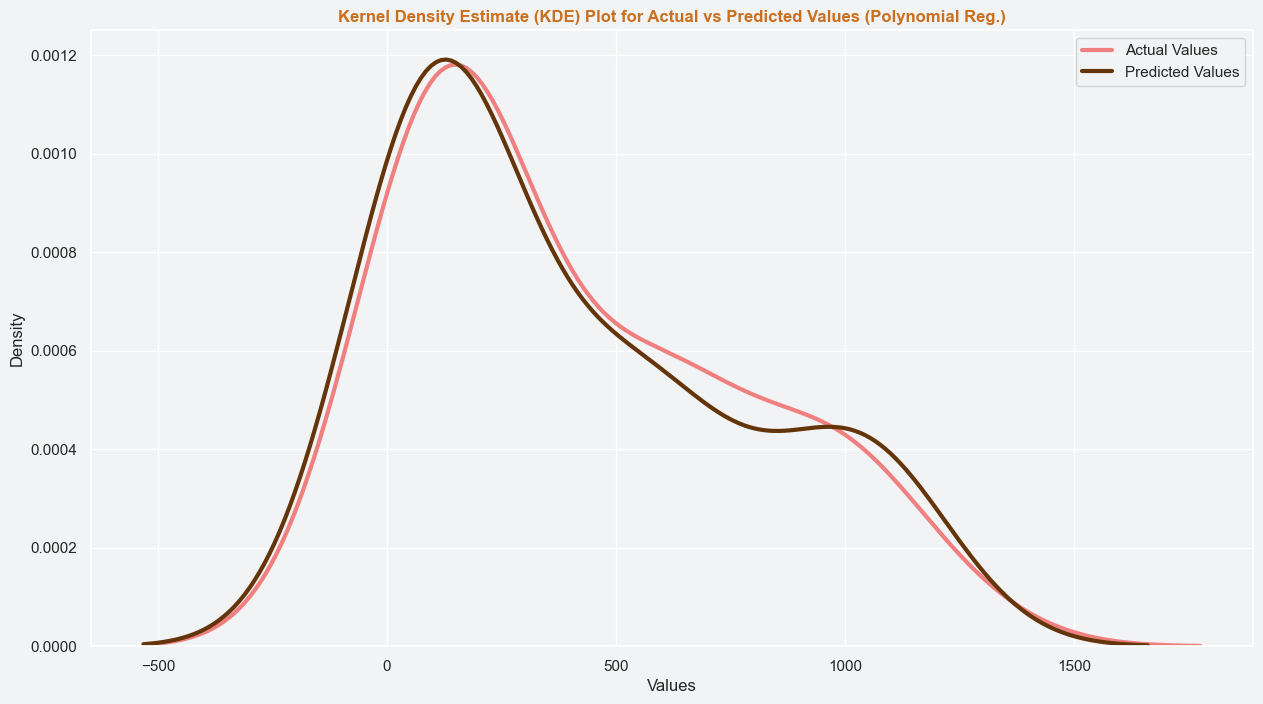

In [48]:
## Create kernel density estimate (KDE) plots
sns.kdeplot(x=y_test, linewidth=3, label='Actual Values')
sns.kdeplot(x=poly_test_predict, linewidth=3, color="#64340A", label='Predicted Values')
plt.xlabel("Values")
plt.ylabel("Density")
plt.title("Kernel Density Estimate (KDE) Plot for Actual vs Predicted Values (Polynomial Reg.)", weight="bold", color="#CA6F1E")
plt.legend()  # Display legend
## Show plot
plt.show()

In [52]:
import pickle

with open("poly_reg.pkl", "wb") as file:
    _ = pickle.dump(poly_reg, file)



<div class="alert alert-block alert-info" style="background-color:#3b3745;
                                                 color:white;
                                                 border-color:black;
                                                 border-radius:5px;
                                                 width:100%;
                                                 margin: auto;
                                                 text-align: left;">
<h3> Conclusions: </h3>
<b>
The SGD and Linear Regression models exhibit similar performance, while the Polynomial Regression demonstrates superior performance.
</b>
</div>

<div style=" background-color:#3b3745;
            text-align:left;
            padding: 13px 13px; 
            border-radius: 8px; 
            margin: auto;
            font-weight: bold;
            color: white">
<ul>
    If you find the notebook helpful, please give it an upvote. If you have any comments, please let me know, and I'll be happy.
</ul>
</div>